In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


장기체류 외국인 유동인구 데이터 전처리 

In [3]:
long_term_frgn = pd.read_csv('/content/02-2_장기체류 외국인 유동인구_LONG_TERM_FRGN.CSV', encoding = 'cp949')
long_term_frgn.head()

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd
0,2018-01-01,1,CAN,제주시,50110250,한림읍,6.3381,0.0000,4.5802,제주
1,2018-01-01,1,CHN,제주시,50110250,한림읍,442.1091,0.0000,5.7051,제주
2,2018-01-01,1,CHN,제주시,50110250,한림읍,0.0000,7.8695,51.3461,그외
3,2018-01-01,1,DEU,제주시,50110250,한림읍,0.0000,0.0000,8.2099,그외
4,2018-01-01,1,ETC,제주시,50110250,한림읍,15.9184,0.0000,2.8758,제주


In [4]:
long_term_frgn = long_term_frgn.loc[:, ['base_date', 'time', 'nationality', 'emd_nm', 'resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt']]
long_term_frgn.head()

,base_date,time,nationality,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
0,2018-01-01,1,CAN,한림읍,6.3381,0.0000,4.5802
1,2018-01-01,1,CHN,한림읍,442.1091,0.0000,5.7051
2,2018-01-01,1,CHN,한림읍,0.0000,7.8695,51.3461
3,2018-01-01,1,DEU,한림읍,0.0000,0.0000,8.2099
4,2018-01-01,1,ETC,한림읍,15.9184,0.0000,2.8758


In [5]:
long_term_frgn['base_date'] = pd.to_datetime(long_term_frgn['base_date'])
long_term_frgn['year'] = long_term_frgn['base_date'].dt.year
long_term_frgn['month'] = long_term_frgn['base_date'].dt.month

In [6]:
long_term_frgn = long_term_frgn[['year', 'month', 'emd_nm', 'nationality', 'time', 'resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt']]
long_term_frgn.head()

,year,month,emd_nm,nationality,time,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
0,2018,1,한림읍,CAN,1,6.3381,0.0000,4.5802
1,2018,1,한림읍,CHN,1,442.1091,0.0000,5.7051
2,2018,1,한림읍,CHN,1,0.0000,7.8695,51.3461
3,2018,1,한림읍,DEU,1,0.0000,0.0000,8.2099
4,2018,1,한림읍,ETC,1,15.9184,0.0000,2.8758


In [7]:
long_term_frgn.loc[:,['resd_pop_cnt', 'work_pop_cnt','visit_pop_cnt']].corr()

,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
resd_pop_cnt,1.000000,0.699343,0.552945
work_pop_cnt,0.699343,1.000000,0.617122
visit_pop_cnt,0.552945,0.617122,1.000000


In [8]:
long_term_frgn = long_term_frgn.drop(['work_pop_cnt'], axis=1)

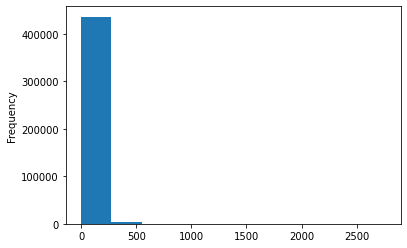

In [9]:
long_term_frgn['resd_pop_cnt'].plot.hist()

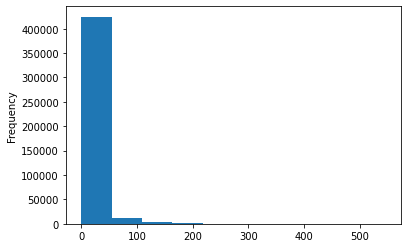

In [10]:
long_term_frgn['visit_pop_cnt'].plot.hist()

In [11]:
long_term_frgn['resd_pop_cnt'] = np.log(long_term_frgn[['resd_pop_cnt']])
long_term_frgn['visit_pop_cnt'] = np.log(long_term_frgn[['visit_pop_cnt']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [12]:
long_term_frgn = long_term_frgn.replace([np.inf, -np.inf], np.nan)

In [13]:
long_term_frgn.isnull().sum()

year                  0
month                 0
emd_nm                0
nationality           0
time                  0
resd_pop_cnt     208544
visit_pop_cnt    150719
dtype: int64

In [14]:
long_term_frgn.dropna(inplace = True)

In [15]:
def outlier_iqr(data, column):   
    global lower, upper    
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)             
    iqr = q75 - q25    
    cut_off = iqr * 1.5              
    lower, upper = q25 - cut_off, q75 + cut_off     
    
    print('IQR은',iqr, '이다.')     
    print('lower bound 값은', lower, '이다.')     
    print('upper bound 값은', upper, '이다.')    
       
    data1 = data[data[column] > upper]     
    data2 = data[data[column] < lower]    
     
    return print('총 이상치 개수는', data1.shape[0] + data2.shape[0], '이다.')

In [16]:
outlier_iqr(long_term_frgn, 'resd_pop_cnt')

IQR은 1.7620214007816086 이다.
lower bound 값은 -0.23818829814962816 이다.
upper bound 값은 6.809897304976806 이다.
총 이상치 개수는 1347 이다.


In [17]:
outlier_iqr(long_term_frgn, 'visit_pop_cnt')

IQR은 1.4597106839346539 이다.
lower bound 값은 -0.4528613024230699 이다.
upper bound 값은 5.385981433315545 이다.
총 이상치 개수는 806 이다.


In [18]:
long_term_frgn = long_term_frgn[(long_term_frgn['resd_pop_cnt'] < upper) & (long_term_frgn['resd_pop_cnt'] > lower)]

In [19]:
long_term_frgn = long_term_frgn[(long_term_frgn['visit_pop_cnt'] < upper) & (long_term_frgn['visit_pop_cnt'] > lower)]

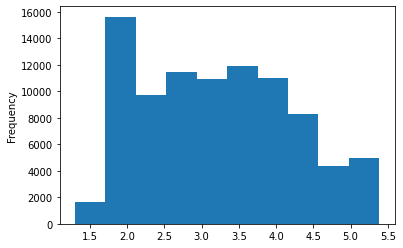

In [20]:
long_term_frgn['resd_pop_cnt'].plot.hist()

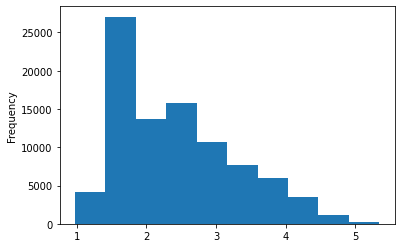

In [21]:
long_term_frgn['visit_pop_cnt'].plot.hist()

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [23]:
pd.options.display.float_format = '{:.1f}'.format

In [24]:
long_term_frgn[['resd_pop_cnt', 'visit_pop_cnt']] = scaler.fit_transform(long_term_frgn[['resd_pop_cnt', 'visit_pop_cnt']])
long_term_frgn.head()

,year,month,emd_nm,nationality,time,resd_pop_cnt,visit_pop_cnt
0,2018,1,한림읍,CAN,1,-1.4,-1.0
4,2018,1,한림읍,ETC,1,-0.4,-1.6
12,2018,1,한림읍,LKA,1,1.5,0.0
14,2018,1,한림읍,MGL,1,0.6,-0.2
16,2018,1,한림읍,NPL,1,1.2,-0.5


d = 1 - 6, m = 7 - 12, a = 13 - 18, n = 19 - 24

In [25]:
long_term = long_term_frgn.copy()

In [26]:
long_term['time'].replace({1: 'd', 2 : 'd', 3 : 'd', 4 : 'd', 5 : 'd', 6 : 'd'}, inplace=True)
long_term['time'].replace({7: 'm', 8 : 'm', 9 : 'm', 10 : 'm', 11 : 'm', 12 : 'm'}, inplace=True)
long_term['time'].replace({13: 'a', 14 : 'a', 15 : 'a', 16 : 'a', 17 : 'a', 18 : 'a'}, inplace=True)
long_term['time'].replace({19: 'n', 20 : 'n', 21 : 'n', 22 : 'n', 23 : 'n', 24 : 'n'}, inplace=True)

asia = as, europe = eur, oceania = oce, north america = na, 기타 = etc

In [27]:
long_term['nationality'].replace({'CHN': 'As', 'VNM' : 'As', 'IDN' : 'As', 'LKA' : 'As', 'PHL' : 'As', 'NPL' : 'As', 'MGL' : 'As', 'KHM' : 'As', 'THA' : 'As', 'JPN' : 'As', 'TWN' : 'As', 'MMR' : 'As', 'UZB' : 'As', 'PAK' : 'As', 'KAZ' : 'As', 'MYS' : 'As', 'KGZ' : 'As', 'IND' : 'As'}, inplace=True)
long_term['nationality'].replace({'USA' : 'Na', 'CAN' : 'Na'}, inplace=True)
long_term['nationality'].replace({'GBR' : 'Eur', 'RUS' : 'Eur', 'FRA' : 'Eur'}, inplace=True)
long_term['nationality'].replace({'AUS' : 'Oce', 'NZL' : 'Oce'}, inplace=True)

In [28]:
long_term = pd.get_dummies(long_term, columns = ['time', 'nationality'])

In [29]:
long_term.head()

,year,month,emd_nm,resd_pop_cnt,visit_pop_cnt,time_a,time_d,time_m,time_n,nationality_As,nationality_ETC,nationality_Eur,nationality_Na,nationality_Oce
0,2018,1,한림읍,-1.4,-1.0,0,1,0,0,0,0,0,1,0
4,2018,1,한림읍,-0.4,-1.6,0,1,0,0,0,1,0,0,0
12,2018,1,한림읍,1.5,0.0,0,1,0,0,1,0,0,0,0
14,2018,1,한림읍,0.6,-0.2,0,1,0,0,1,0,0,0,0
16,2018,1,한림읍,1.2,-0.5,0,1,0,0,1,0,0,0,0


음식물 쓰레기 데이터 전처리

In [30]:
food_waste_month = pd.read_csv('food_waste_month.csv', encoding = 'cp949')
food_waste_month.head()

,base_date,emd_nm,sum(em_cnt),sum(em_g),sum(pay_amt)
0,2018-01,건입동,18416,45646550,1364804
1,2018-01,남원읍,9570,42437700,1270773
2,2018-01,노형동,113990,265018400,7883340
3,2018-01,대륜동,21666,57612600,1676850
4,2018-01,대정읍,10185,38885550,1164122


In [31]:
food_waste_month['base_date'] = pd.to_datetime(food_waste_month['base_date'])
food_waste_month['year'] = food_waste_month['base_date'].dt.year 
food_waste_month['month'] = food_waste_month['base_date'].dt.month

In [32]:
food_waste_month = food_waste_month[['year', 'month', 'emd_nm', 'sum(em_g)']]
food_waste_month.head()

,year,month,emd_nm,sum(em_g)
0,2018,1,건입동,45646550
1,2018,1,남원읍,42437700
2,2018,1,노형동,265018400
3,2018,1,대륜동,57612600
4,2018,1,대정읍,38885550


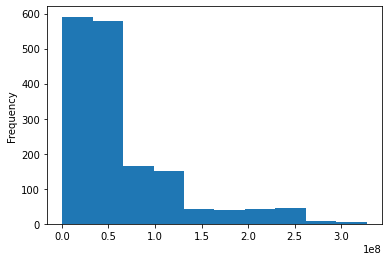

In [33]:
food_waste_month['sum(em_g)'].plot.hist()

In [34]:
food_waste_month['sum(em_g)'] = np.log(food_waste_month[['sum(em_g)']])

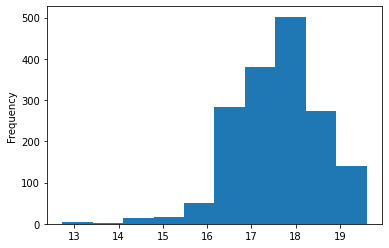

In [35]:
food_waste_month['sum(em_g)'].plot.hist()

In [36]:
outlier_iqr(food_waste_month, 'sum(em_g)')

IQR은 1.255197116730578 이다.
lower bound 값은 15.073569121533883 이다.
upper bound 값은 20.094357588456194 이다.
총 이상치 개수는 25 이다.


In [37]:
food_waste_month = food_waste_month[(food_waste_month['sum(em_g)'] < upper) & (food_waste_month['sum(em_g)'] > lower)]

In [38]:
food_waste_month['sum(em_g)'] = scaler.fit_transform(food_waste_month[['sum(em_g)']])

y와의 상관계수


In [39]:
longterm_food_merge = pd.merge(long_term, food_waste_month, on = ['year', 'month', 'emd_nm'],  how = 'inner')
longterm_food_merge.head()

,year,month,emd_nm,resd_pop_cnt,visit_pop_cnt,time_a,time_d,time_m,time_n,nationality_As,nationality_ETC,nationality_Eur,nationality_Na,nationality_Oce,sum(em_g)
0,2018,1,애월읍,0.2,-0.2,0,1,0,0,0,0,0,1,0,-2.0
1,2018,1,애월읍,0.9,1.6,0,1,0,0,1,0,0,0,0,-2.0
2,2018,1,애월읍,1.1,-0.5,0,1,0,0,1,0,0,0,0,-2.0
3,2018,1,애월읍,-1.1,-0.8,0,1,0,0,1,0,0,0,0,-2.0
4,2018,1,애월읍,0.8,-0.5,0,1,0,0,1,0,0,0,0,-2.0


In [40]:
longterm_food_merge.shape

(76804, 15)

In [41]:
longterm_food_merge.drop_duplicates()

,year,month,emd_nm,resd_pop_cnt,visit_pop_cnt,time_a,time_d,time_m,time_n,nationality_As,nationality_ETC,nationality_Eur,nationality_Na,nationality_Oce,sum(em_g)
0,2018,1,애월읍,0.2,-0.2,0,1,0,0,0,0,0,1,0,-2.0
1,2018,1,애월읍,0.9,1.6,0,1,0,0,1,0,0,0,0,-2.0
2,2018,1,애월읍,1.1,-0.5,0,1,0,0,1,0,0,0,0,-2.0
3,2018,1,애월읍,-1.1,-0.8,0,1,0,0,1,0,0,0,0,-2.0
4,2018,1,애월읍,0.8,-0.5,0,1,0,0,1,0,0,0,0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76799,2018,1,효돈동,-0.4,-0.7,0,0,0,1,1,0,0,0,0,-1.0
76800,2018,1,효돈동,-0.4,-0.7,0,1,0,0,1,0,0,0,0,-1.0
76801,2018,1,효돈동,-0.4,-0.7,0,1,0,0,1,0,0,0,0,-1.0
76802,2018,1,효돈동,-0.4,-0.7,0,0,1,0,1,0,0,0,0,-1.0


In [42]:
np.corrcoef(longterm_food_merge['resd_pop_cnt'], longterm_food_merge['sum(em_g)'])[0, 1]

-0.11442305958000512

In [43]:
np.corrcoef(longterm_food_merge['visit_pop_cnt'], longterm_food_merge['sum(em_g)'])[0, 1]

-0.13260878867800674

회귀분석

In [44]:
longterm_food_merge.rename(columns = {'sum(em_g)' : 'em_g'}, inplace = True)

In [45]:
longterm_food_merge.head()

,year,month,emd_nm,resd_pop_cnt,visit_pop_cnt,time_a,time_d,time_m,time_n,nationality_As,nationality_ETC,nationality_Eur,nationality_Na,nationality_Oce,em_g
0,2018,1,애월읍,0.2,-0.2,0,1,0,0,0,0,0,1,0,-2.0
1,2018,1,애월읍,0.9,1.6,0,1,0,0,1,0,0,0,0,-2.0
2,2018,1,애월읍,1.1,-0.5,0,1,0,0,1,0,0,0,0,-2.0
3,2018,1,애월읍,-1.1,-0.8,0,1,0,0,1,0,0,0,0,-2.0
4,2018,1,애월읍,0.8,-0.5,0,1,0,0,1,0,0,0,0,-2.0


In [55]:
result = smf.ols(formula = 'em_g ~ resd_pop_cnt + visit_pop_cnt + time_a + time_d + time_m + time_n + nationality_As + nationality_ETC + nationality_Eur + nationality_Na + nationality_Oce', data = longterm_food_merge).fit()

In [56]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   em_g   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     322.1
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        18:18:17   Log-Likelihood:            -1.2636e+05
No. Observations:               76804   AIC:                         2.527e+05
Df Residuals:                   76794   BIC:                         2.528e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -9.58e+11    5.5e+11     -1.743      0.081   -2.04e+12    1.19e+11
resd_pop_cnt       -0.0793      0.005    -15.050      0.000      -0.090      -0.069
visit_pop_cnt      -0.0985      0.005    -18.058      0.000      -0.109      -0.088
time_a           1.738e+12   9.97e+11      1.743      0.081   -2.16e+11    3.69e+12
time_d           1.738e+12   9.97e+11      1.743      0.081   -2.16e+11    3.69e+12
time_m           1.738e+12   9.97e+11      1.743      0.081   -2.16e+11    3.69e+12
time_n           1.738e+12   9.97e+11      1.743      0.081   -2.16e+11    3.69e+12
nationality_As  -7.797e+11   4.47e+11     -1.743      0.081   -1.66e+12    9.71e+10
nationality_ETC -7.797e+11   4.47e+11     -1.743      0.081   -1.66e+12    9.71e+10
nationality_Eur -7.797e+11   4.47e+11     -1.743      0.081   -1.66e+12    9.71e+10
nationality_Na  -7.797e+11   4.47e+11     -1.743      0.081   -1.66e+12    9.71e+10
nationality_Oce -7.797e+11   4.47e+11     -1.743      0.081   -1.66e+12    9.71e+10
==============================================================================
Omnibus:                    15835.007   Durbin-Watson:                   0.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3214.032
Skew:                          -0.110   Prob(JB):                         0.00
Kurtosis:                       2.022   Cond. No.                     2.43e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.45e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""